In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import os
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('Employee Future Prediction.csv')

# preprocess

C:\Users\user\AppData\Local\Temp\ipykernel_9444\4011866140.py:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  2764.000000  2764.000000  2764.000000                2764.000000   
mean   2015.090449     2.636035    30.952967                   2.644356   
std       1.885943     0.624001     5.108872                   1.610610   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     2.000000    27.000000                   1.000000   
50%    2015.000000     3.000000    30.000000                   2.000000   
75%    2017.000000     3.000000    35.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  2764.000000  
mean      0.393632  
std       0.488643  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


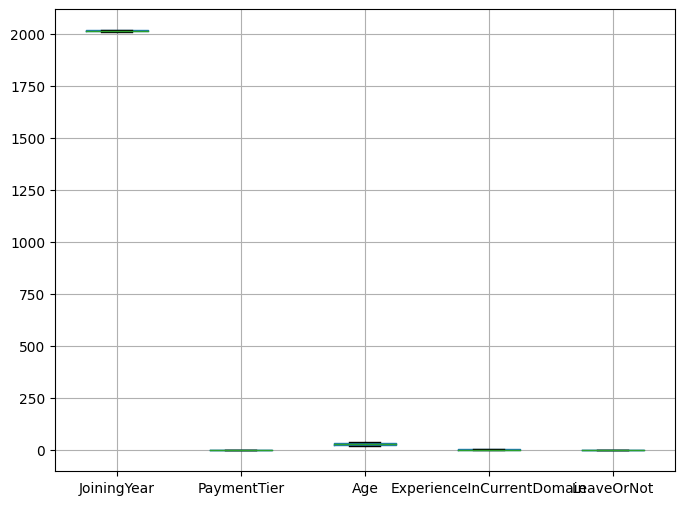

In [3]:
# Drop duplicate columns
df = df.T.drop_duplicates().T

# Drop duplicate rows
df = df.drop_duplicates(keep='first')

# Missing values
df = df.fillna(df.median())

# Use describe() method to get summary statistics
print(df.describe())

# Create box plots to visualize data distribution
plt.figure(figsize=(8, 6))
boxplot = df.boxplot()
plt.show()

In [4]:
#label encoding
# create a label encoder object
le = preprocessing.LabelEncoder()

# fit and transform the string column to numeric
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])
 
# Printing the encoded dataframe
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4645,1,2017,2,2,31,0,0,2,0
4647,0,2016,2,3,30,1,0,2,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1


# Decision-Tree

In [5]:
# Shuffle dataset
df = df.sample(frac=1) 
 
# split the dataset into training and testing sets
X = df.iloc[:,0:8]
y = df['LeaveOrNot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=0)

# create a decision tree classifier model & train the model on the training set
clf = DecisionTreeClassifier().fit(X_train, y_train)

# Make predictions on the testing set using the trained model
predictions = clf.predict(X_test)
#print(y_pred)

Accuracy DT

In [6]:
# Compare the predicted values with the actual values to calculate the accuracy
correct = 0
for i in range(len(predictions)):
    if predictions[i] == y_test.values[i]:
        correct += 1

accuracy = correct / len(predictions)

print("Accuracy:", accuracy * 100, "%")
print("Accuracy:", accuracy)

Accuracy: 68.61702127659575 %
Accuracy: 0.6861702127659575


Precision DT

In [7]:
# Calculate the number of true positives (TP) and false positives (FP)
tp = 0
fp = 0
for i in range(len(predictions)):
    if predictions[i] == 1 and y_test.values[i] == 1:
        tp += 1
    elif predictions[i] == 1 and y_test.values[i] == 0:
        fp += 1

# Calculate precision as TP / (TP + FP)
precision = tp / (tp + fp)

print("Precision:", precision * 100, "%")

Precision: 57.52212389380531 %


Recall DT

In [8]:
# Calculate the number of true positives (TP) and false negatives (FN)
tp = 0
fn = 0
for i in range(len(predictions)):
    if predictions[i] == 1 and y_test.values[i] == 1:
        tp += 1
    elif predictions[i] == 0 and y_test.values[i] == 1:
        fn += 1

# Calculate recall as TP / (TP + FN)
recall = tp / (tp + fn)

print("Recall:", recall * 100, "%")

Recall: 56.358381502890175 %


F1 Score  DT

In [9]:
# Calculate F1 score as 2 * (precision * recall) / (precision + recall)
f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score:", f1_score * 100, "%")

F1 Score: 56.934306569343065 %


# Naive Bayes

In [10]:
# Shuffle dataset
#df = df.sample(frac=1)  

# split the dataset into training and testing sets  .drop('Outcome (Class Attribute)', axis=1)
#X = df.iloc[:,0:8]
#y = df['LeaveOrNot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=0)

# Create an instance of the Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

Accuracy NB

In [11]:
# Calculate the accuracy
accuracy = (y_pred == y_test).sum() / len(y_test)

print(f'Accuracy: {accuracy:.3f}')
print("Accuracy:", accuracy * 100, "%")

Accuracy: 0.648
Accuracy: 64.7872340425532 %


precision, recall, F1 score   NB

In [12]:
# Calculate the precision, recall, and F1 score
tp = ((y_test == 1) & (y_pred == 1)).sum()
fp = ((y_test == 0) & (y_pred == 1)).sum()
fn = ((y_test == 1) & (y_pred == 0)).sum()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Precision: {precision:.3f}')
print("Precision:", precision * 100, "%")
print(f'Recall: {recall:.3f}')
print("Recall:", recall * 100, "%")
print(f'F1 Score: {f1_score:.3f}')
print("F1 Score:", f1_score * 100, "%")

Precision: 0.525
Precision: 52.52525252525253 %
Recall: 0.451
Recall: 45.08670520231214 %
F1 Score: 0.485
F1 Score: 48.52255054432349 %


# 3-fold validation

Decision Tree

In [13]:
# Shuffle dataset
#df = df.sample(frac=1)  

#X = df.iloc[:,0:8]
#y = df['LeaveOrNot']

kf = KFold(n_splits=3)

# Initialize empty lists to store the evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, val_index in kf.split(X):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]
    
    # Train model on X_train and y_train here
    clf = DecisionTreeClassifier().fit(X_train, y_train)
    
    # Make predictions on X_val using your trained model and calculate the evaluation metrics
    y_pred = clf.predict(X_val)
    
    
    tp = len(np.intersect1d(np.where(y_val == 1), np.where(y_pred == 1)))
    fp = len(np.intersect1d(np.where(y_val == 0), np.where(y_pred == 1)))
    tn = len(np.intersect1d(np.where(y_val == 0), np.where(y_pred == 0)))
    fn = len(np.intersect1d(np.where(y_val == 1), np.where(y_pred == 0)))

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    # Store the evaluation metrics for this fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1_score)
    
    

# Calculate the average evaluation metrics across all 3 folds
print('Decision tree classifier:')
average_accuracy = sum(accuracy_scores) / 3
print('average_accuracy', average_accuracy * 100, "%")

average_precision = sum(precision_scores) / 3
print('average_precision', average_precision * 100, "%")

average_recall = sum(recall_scores) / 3
print('average_recall', average_recall * 100, "%")

average_f1_score = sum(f1_scores) / 3
print('average_f1_score', average_f1_score * 100, "%")

Decision tree classifier:
average_accuracy 69.21145003348398 %
average_precision 61.06070186764773 %
average_recall 59.999693434547105 %
average_f1_score 60.49572580790704 %


Naive Bayes

In [14]:
# Shuffle dataset
#df = df.sample(frac=1)  

#X = df.iloc[:,0:8]
#y = df['LeaveOrNot']

kf = KFold(n_splits=3)

# Initialize empty lists to store the evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, val_index in kf.split(X):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]
    
    # Train model on X_train and y_train here
    nb = GaussianNB().fit(X_train, y_train)

    
    # Make predictions on X_val using your trained model and calculate the evaluation metrics
    y_pred = nb.predict(X_val)
    
    
    tp = len(np.intersect1d(np.where(y_val == 1), np.where(y_pred == 1)))
    fp = len(np.intersect1d(np.where(y_val == 0), np.where(y_pred == 1)))
    tn = len(np.intersect1d(np.where(y_val == 0), np.where(y_pred == 0)))
    fn = len(np.intersect1d(np.where(y_val == 1), np.where(y_pred == 0)))

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    # Store the evaluation metrics for this fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1_score)
    
    

# Calculate the average evaluation metrics across all 3 folds
print('Naive Bayes classifier:')
average_accuracy = sum(accuracy_scores) / 3
print('average_accuracy', average_accuracy * 100, "%")

average_precision = sum(precision_scores) / 3
print('average_precision', average_precision * 100, "%")

average_recall = sum(recall_scores) / 3
print('average_recall', average_recall * 100, "%")

average_f1_score = sum(f1_scores) / 3
print('average_f1_score', average_f1_score * 100, "%")

Naive Bayes classifier:
average_accuracy 66.20892126590685 %
average_precision 59.8266149746321 %
average_recall 43.665443942148734 %
average_f1_score 50.33558892957303 %


# 5-fold validation

Decision Tree

In [15]:
#X = df.iloc[:,0:8]
#y = df['LeaveOrNot']

kf = KFold(n_splits=5)

# Initialize empty lists to store the evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, val_index in kf.split(X):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]
    
    # Train model on X_train and y_train here
    clf = DecisionTreeClassifier().fit(X_train, y_train)
    
    # Make predictions on X_val using your trained model and calculate the evaluation metrics
    y_pred = clf.predict(X_val)
    
    
    tp = len(np.intersect1d(np.where(y_val == 1), np.where(y_pred == 1)))
    fp = len(np.intersect1d(np.where(y_val == 0), np.where(y_pred == 1)))
    tn = len(np.intersect1d(np.where(y_val == 0), np.where(y_pred == 0)))
    fn = len(np.intersect1d(np.where(y_val == 1), np.where(y_pred == 0)))

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    # Store the evaluation metrics for this fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1_score)
    
    

# Calculate the average evaluation metrics across all 5 folds
print('Decision tree classifier:')
average_accuracy = sum(accuracy_scores) / 5
print('average_accuracy', average_accuracy * 100, "%")

average_precision = sum(precision_scores) / 5
print('average_precision', average_precision * 100, "%")

average_recall = sum(recall_scores) / 5
print('average_recall', average_recall * 100, "%")

average_f1_score = sum(f1_scores) / 5
print('average_f1_score', average_f1_score * 100, "%")

Decision tree classifier:
average_accuracy 68.0898000366905 %
average_precision 59.333710550770434 %
average_recall 60.611275495571945 %
average_f1_score 59.92238009013333 %


Naive Bayes

In [16]:
#X = df.iloc[:,0:8]
#y = df['LeaveOrNot']

kf = KFold(n_splits=5)

# Initialize empty lists to store the evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, val_index in kf.split(X):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]
    
    # Train model on X_train and y_train here
    nb = GaussianNB().fit(X_train, y_train)

    
    # Make predictions on X_val using your trained model and calculate the evaluation metrics
    y_pred = nb.predict(X_val)
    
    
    tp = len(np.intersect1d(np.where(y_val == 1), np.where(y_pred == 1)))
    fp = len(np.intersect1d(np.where(y_val == 0), np.where(y_pred == 1)))
    tn = len(np.intersect1d(np.where(y_val == 0), np.where(y_pred == 0)))
    fn = len(np.intersect1d(np.where(y_val == 1), np.where(y_pred == 0)))

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    # Store the evaluation metrics for this fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1_score)
    
    

# Calculate the average evaluation metrics across all 5 folds
print('Naive Bayes classifier:')
average_accuracy = sum(accuracy_scores) / 5
print('average_accuracy', average_accuracy * 100, "%")

average_precision = sum(precision_scores) / 5
print('average_precision', average_precision * 100, "%")

average_recall = sum(recall_scores) / 5
print('average_recall', average_recall * 100, "%")

average_f1_score = sum(f1_scores) / 5
print('average_f1_score', average_f1_score * 100, "%")

Naive Bayes classifier:
average_accuracy 66.10006027727546 %
average_precision 59.390847154928636 %
average_recall 44.09236765676258 %
average_f1_score 50.539877545322184 %


# pruning

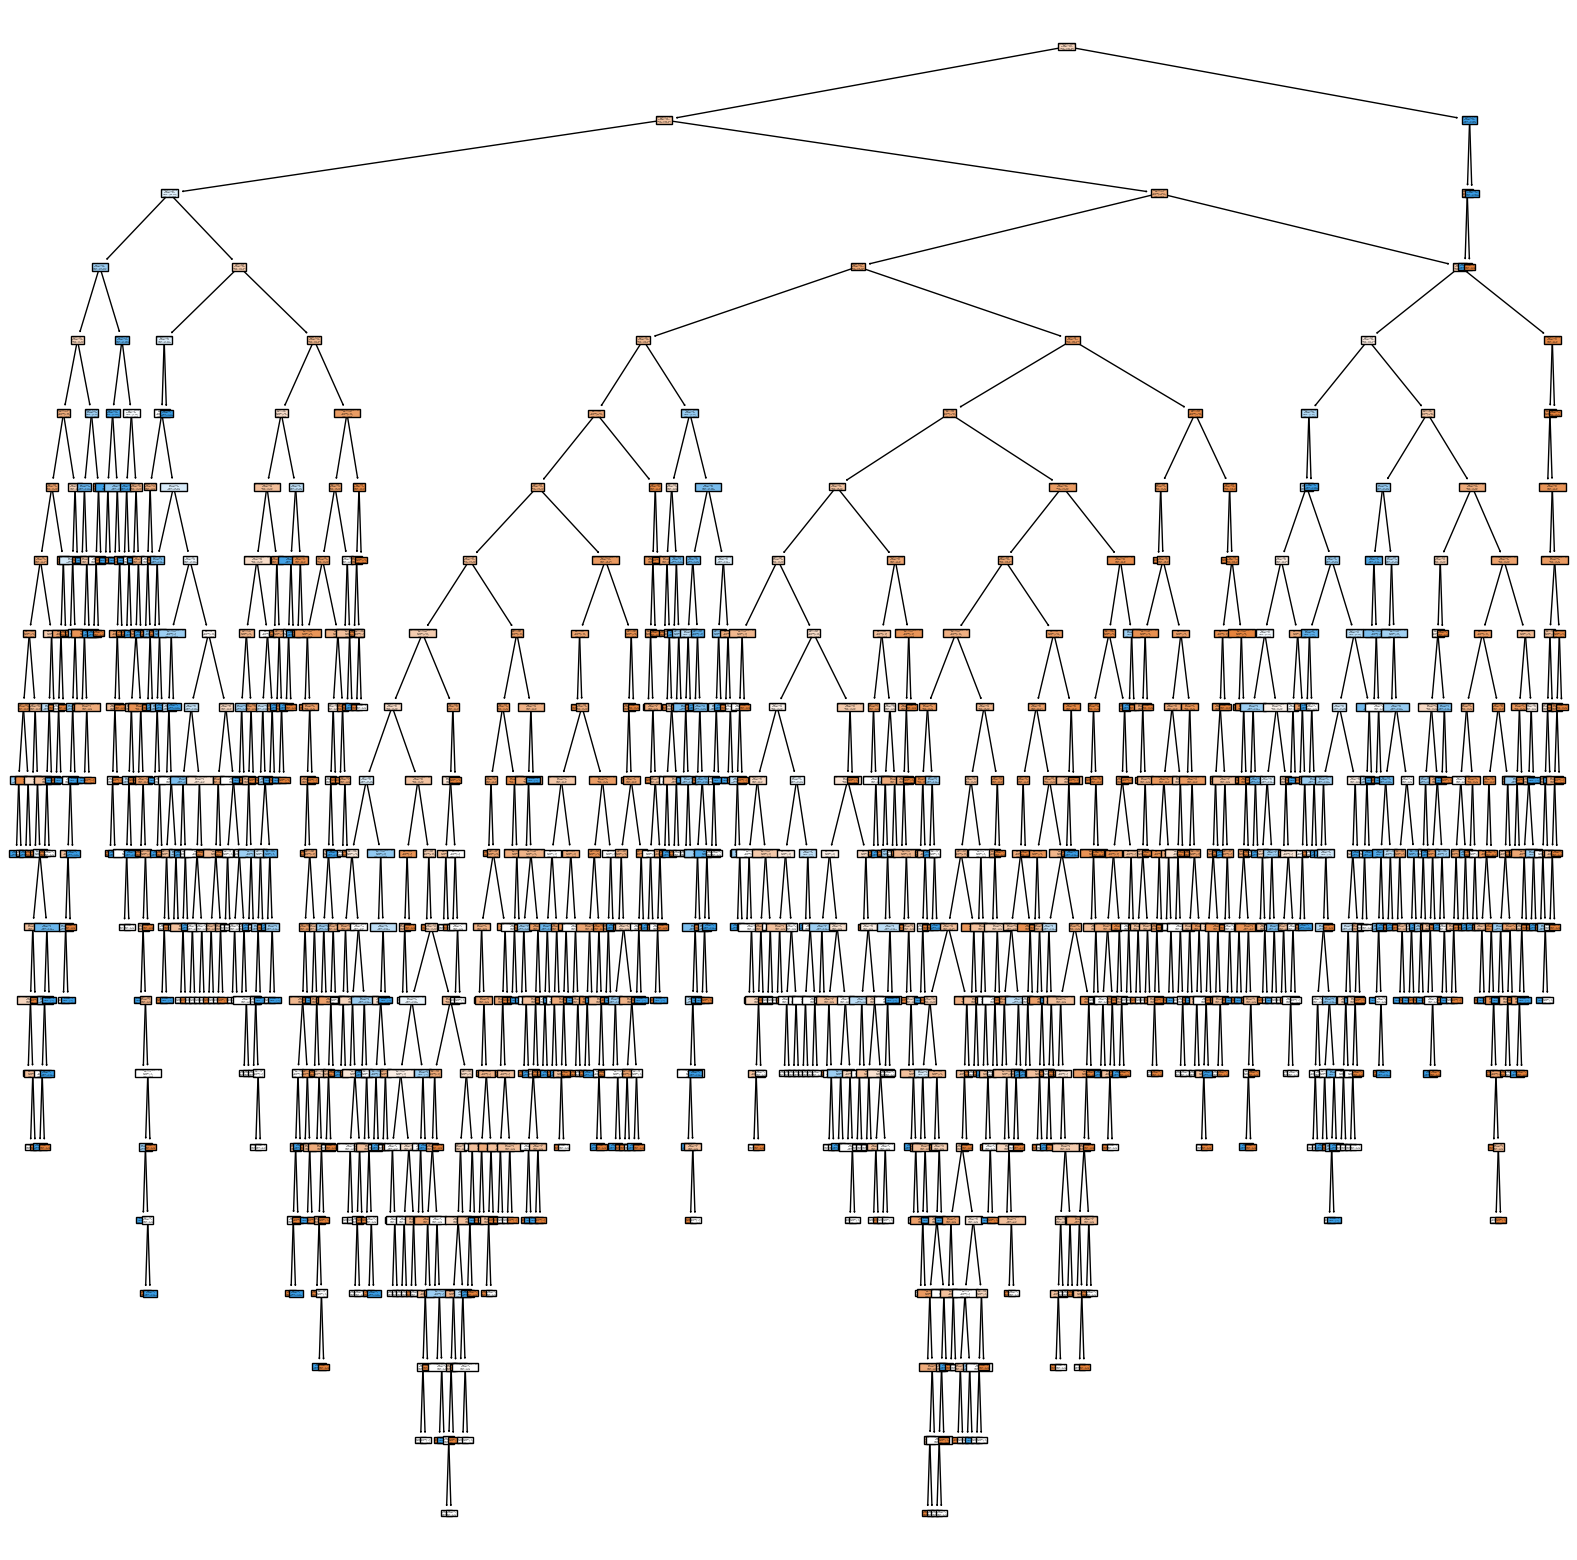

In [17]:
# Visualize the decision tree before pruning

plt.figure(figsize=(20,20))
features = df.columns
classes = ['Leave','Not Leave']
plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [18]:
# Evaluate the accuracy of the decision tree before pruning
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8797872340425532

In [19]:
# confusionmatrix
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

# post pruning

0.7223404255319149

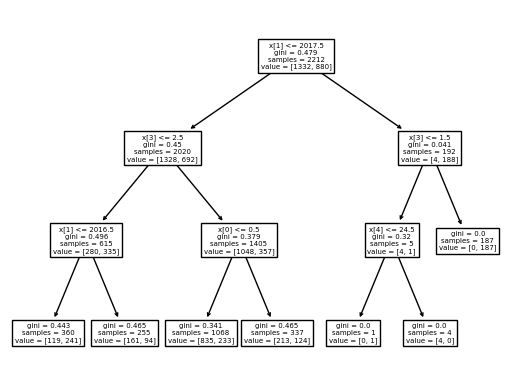

In [20]:
#Perform post-pruning by setting the max_depth parameter
clf_pruned = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_pruned.fit(X_train, y_train)

# Visualize the pruned decision tree:
plot_tree(clf_pruned)

# Evaluate the accuracy of the pruned decision tree:
y_pred_pruned = clf_pruned.predict(X_test)
accuracy_score(y_test, y_pred_pruned)

**Cost Complexity Pruning**

In [21]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.95507025e-05 7.74993542e-05
 8.47649186e-05 9.04159132e-05 9.04159132e-05 9.04159132e-05
 9.04159132e-05 9.04159132e-05 9.04159132e-05 9.04159132e-05
 9.68741927e-05 9.68741927e-05 9.97234337e-05 1.00462126e-04
 1.00462126e-04 1.00462126e-04 1.00462126e-04 1.00462126e-04
 1.00462126e-04 1.02745356e-04 1.08310729e-04 1.13019892e-04
 1.13019892e-04 1.14813858e-04 1.17205813e-04 1.19184613e-04
 1.20554551e-04 1.20554551e-04 1.21069741e-04 1.25873134e-04
 1.29165590e-04 1.291655

In [22]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

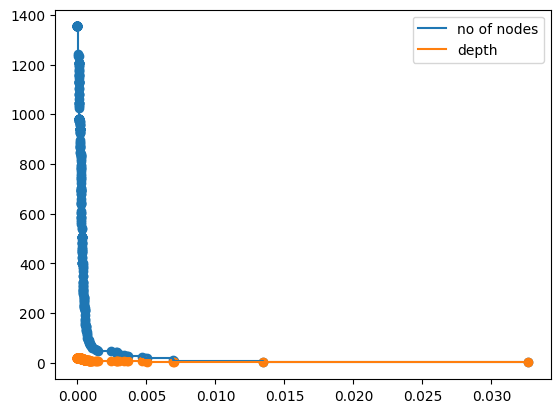

Observation: As alpha increases no of nodes and depth decreases


In [23]:
# We will remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()
print("Observation: As alpha increases no of nodes and depth decreases")

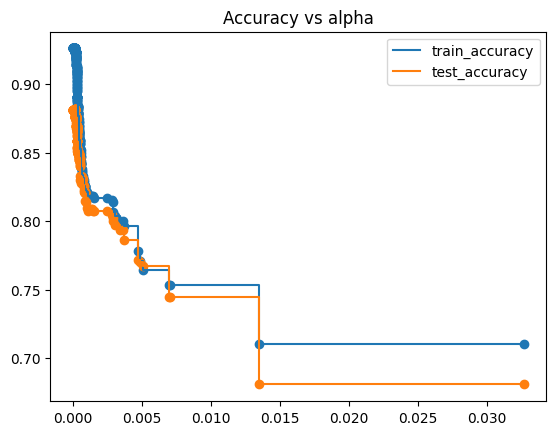

In [24]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.018

Train score 0.7102169981916817
Test score 0.6808510638297872
Train Confusion matrix


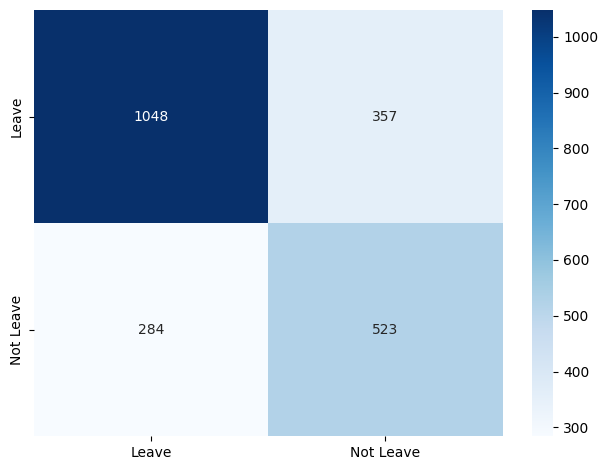

Test Confusion matrix


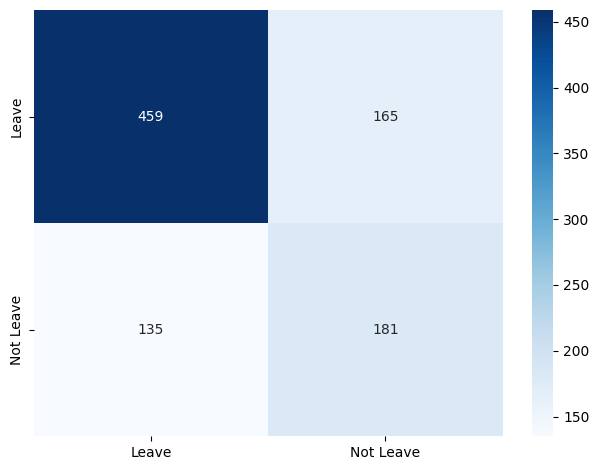

In [25]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.018)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

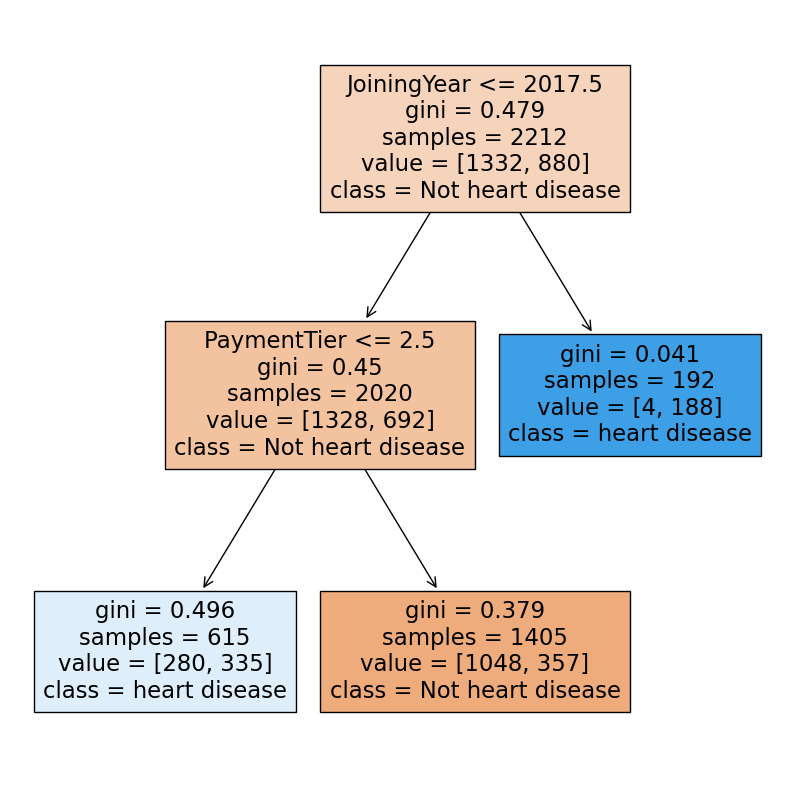

In [26]:
plt.figure(figsize=(10,10))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

# pre pruning

In [27]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.8345388788426763
Test score 0.8212765957446808
Train Confusion matrix


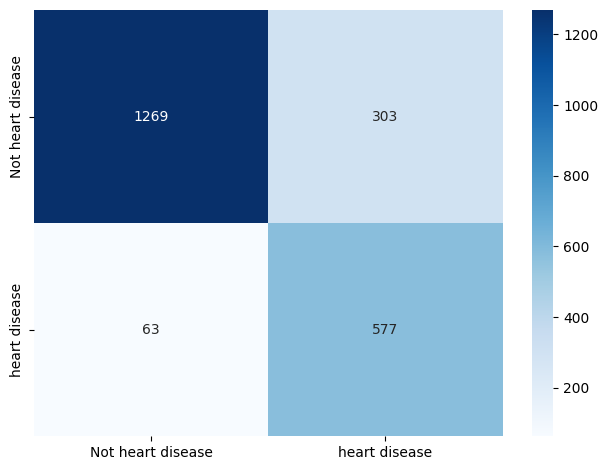

Test Confusion matrix


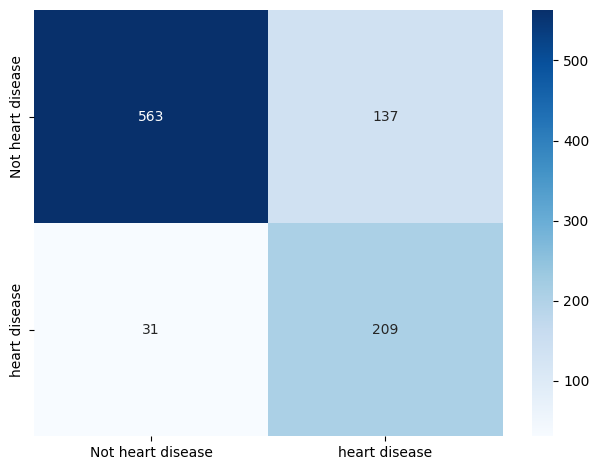

In [28]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

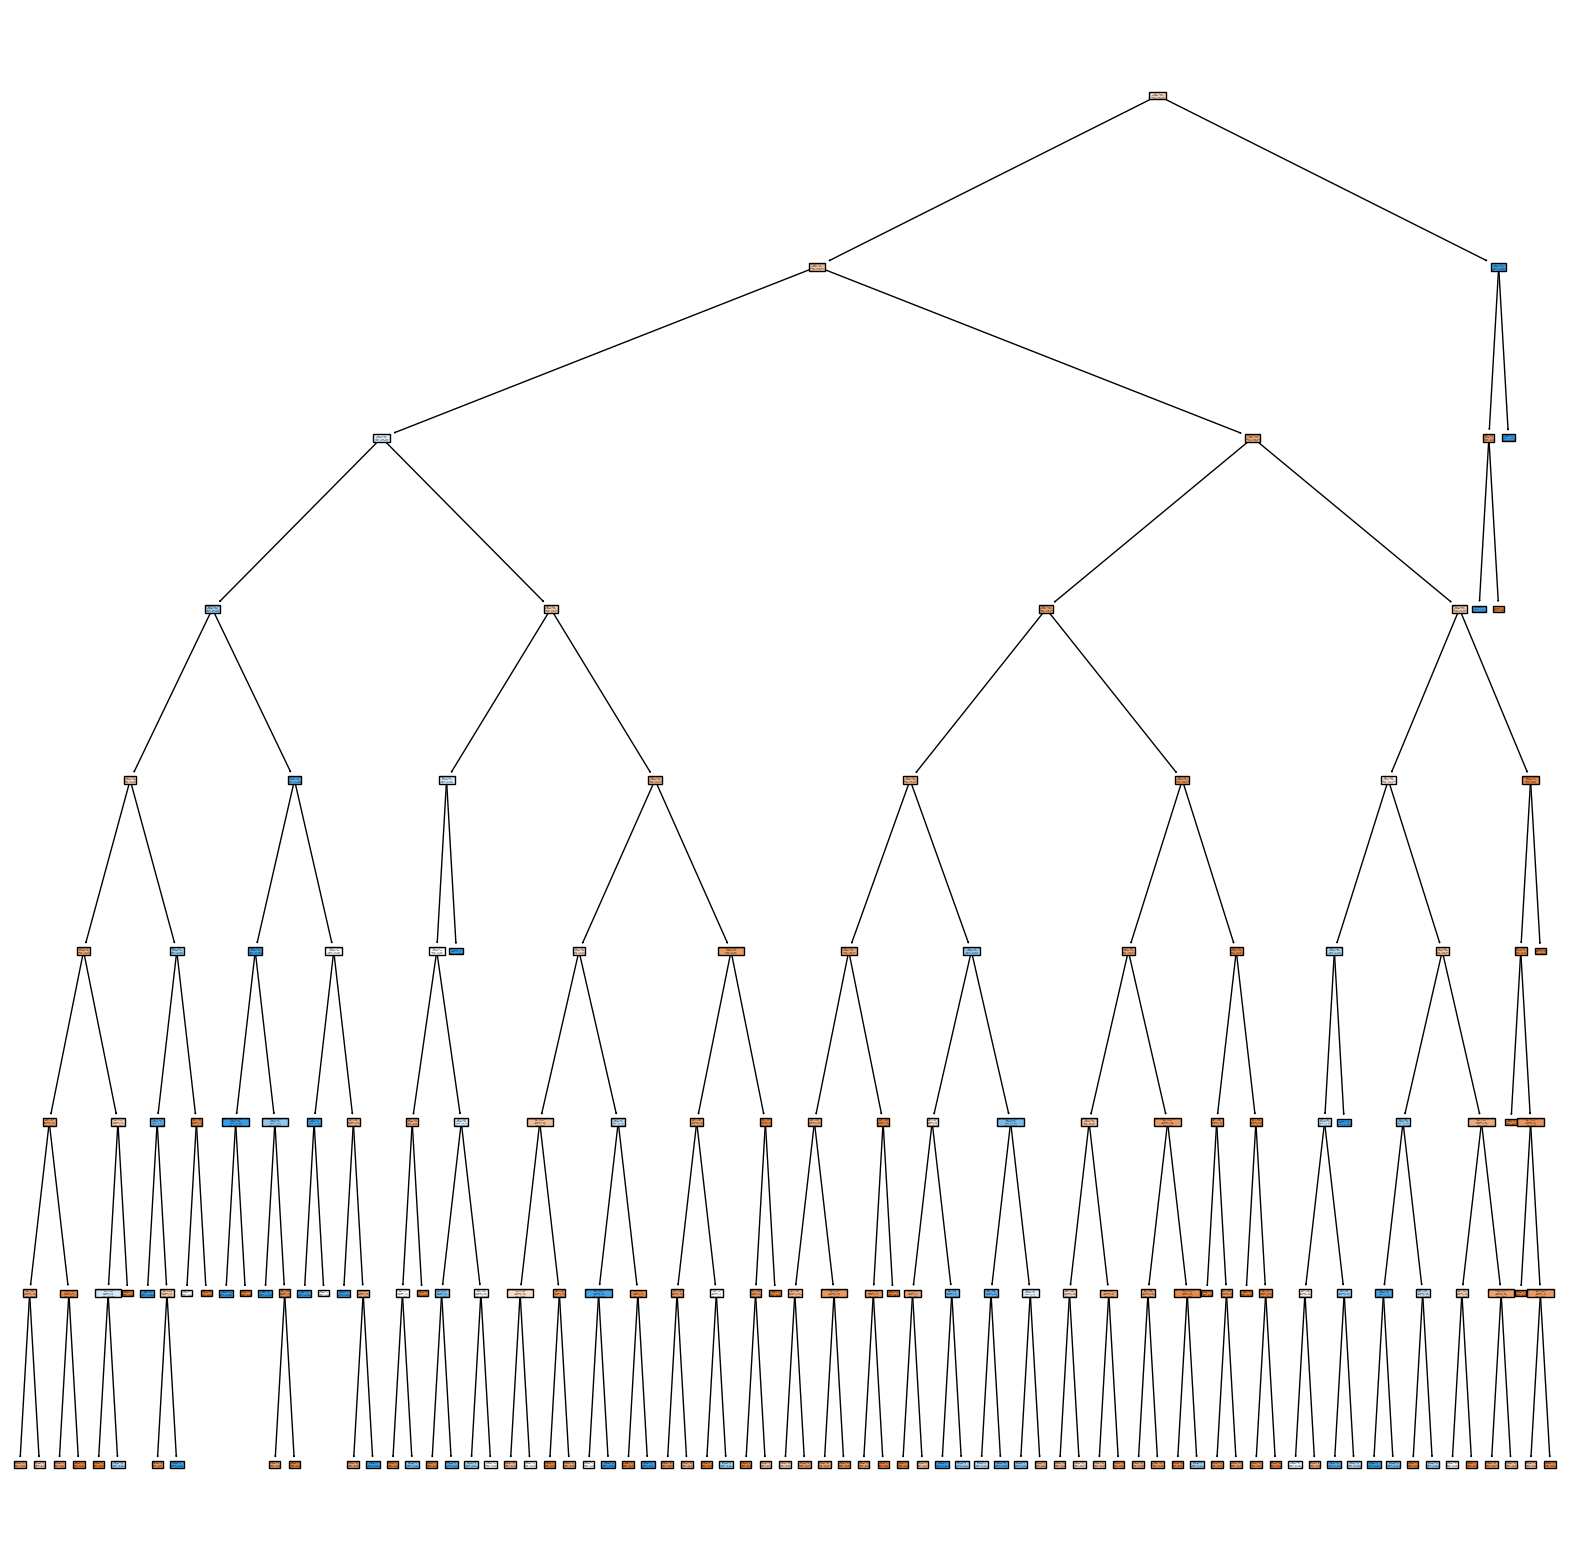

In [29]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Leave','Not Leave']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

ما می‌توانیم ببینیم که درخت هرس شده است و دقت آزمایش بهبود یافته است. اما هنوز جا برای بهبود بیشتر وجود دارد.